Sebastian Raschka, 2015-2022  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: https://rasbt.github.io/mlxtend/

In [12]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

ModuleNotFoundError: No module named 'watermark'

In [4]:
%matplotlib inline

# ExhaustiveFeatureSelector: Optimal feature sets by considering all possible feature combinations

Implementation of an *exhaustive feature selector* for sampling and evaluating all possible feature combinations in a specified range.

> from mlxtend.feature_selection import ExhaustiveFeatureSelector

## Overview

This exhaustive feature selection algorithm is a wrapper approach for brute-force evaluation of feature subsets; the best subset is selected by optimizing a specified performance metric given an arbitrary regressor or classifier. For instance, if the classifier is a logistic regression and the dataset consists of 4 features, the alogorithm will evaluate all 15 feature combinations (if `min_features=1` and `max_features=4`)

- {0}
- {1}
- {2}
- {3}
- {0, 1}
- {0, 2}
- {0, 3}
- {1, 2}
- {1, 3}
- {2, 3}
- {0, 1, 2}
- {0, 1, 3}
- {0, 2, 3}
- {1, 2, 3}
- {0, 1, 2, 3}

and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.



## Example 1 - A simple Iris example

Initializing a simple classifier from scikit-learn:

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('0', '2', '3')


### Feature Names

When working with large datasets, the feature indices might be hard to interpret. In this case, we recommend using pandas DataFrames with distinct column names as input:

In [6]:
import pandas as pd

df_X = pd.DataFrame(X, columns=["Sepal length", "Sepal width", "Petal length", "Petal width"])
df_X.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
efs1 = efs1.fit(df_X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('Sepal length', 'Petal length', 'Petal width')


### Detailed Outputs

Via the `subsets_` attribute, we can take a look at the selected feature indices at each step:

In [8]:
efs1.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.53333333, 0.63333333, 0.7       , 0.7       , 0.53333333]),
  'avg_score': np.float64(0.6199999999999999),
  'feature_names': ('Sepal length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.5       , 0.6       , 0.53333333, 0.4       , 0.5       ]),
  'avg_score': np.float64(0.5066666666666666),
  'feature_names': ('Sepal width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 0.93333333, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9400000000000001),
  'feature_names': ('Petal length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('Petal width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.66666667, 0.76666667, 0.7       , 0.9       , 0.66666667]),
  'avg_score': np.float64(0.74),
  'feature_names': ('Sepal length', 'Sepal width')},
 5: {'feature_idx': (0, 2),
  'cv_

## Example 2 - Visualizing the feature selection results

 For our convenience, we can visualize the output from the feature selection in a pandas DataFrame format using the `get_metric_dict` method of the `ExhaustiveFeatureSelector` object. The columns `std_dev` and `std_err` represent the standard deviation and standard errors of the cross-validation scores, respectively.

Below, we see the DataFrame of the Sequential Forward Selector from Example 2:

In [9]:
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

feature_names = ('sepal length', 'sepal width',
                 'petal length', 'petal width')

df_X = pd.DataFrame(
    X, columns=["Sepal length", "Sepal width", "Petal length", "Petal width"])
efs1 = efs1.fit(df_X, y)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
df

Features: 15/15

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.966...",0.973333,"(Sepal length, Petal length, Petal width)",0.017137,0.013333,0.006667
14,"(0, 1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(Sepal length, Sepal width, Petal length, Peta...",0.027096,0.021082,0.010541
3,"(3,)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(Petal width,)",0.032061,0.024944,0.012472
13,"(1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(Sepal width, Petal length, Petal width)",0.032061,0.024944,0.012472
6,"(0, 3)","[0.9666666666666667, 0.9666666666666667, 0.9, ...",0.953333,"(Sepal length, Petal width)",0.043691,0.033993,0.016997
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.9, ...",0.953333,"(Petal length, Petal width)",0.043691,0.033993,0.016997
5,"(0, 2)","[0.9666666666666667, 1.0, 0.8666666666666667, ...",0.946667,"(Sepal length, Petal length)",0.058115,0.045216,0.022608
11,"(0, 1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.946667,"(Sepal length, Sepal width, Petal width)",0.043691,0.033993,0.016997
2,"(2,)","[0.9333333333333333, 0.9333333333333333, 0.9, ...",0.94,"(Petal length,)",0.041977,0.03266,0.01633
8,"(1, 3)","[0.9666666666666667, 0.9666666666666667, 0.866...",0.94,"(Sepal width, Petal width)",0.049963,0.038873,0.019437


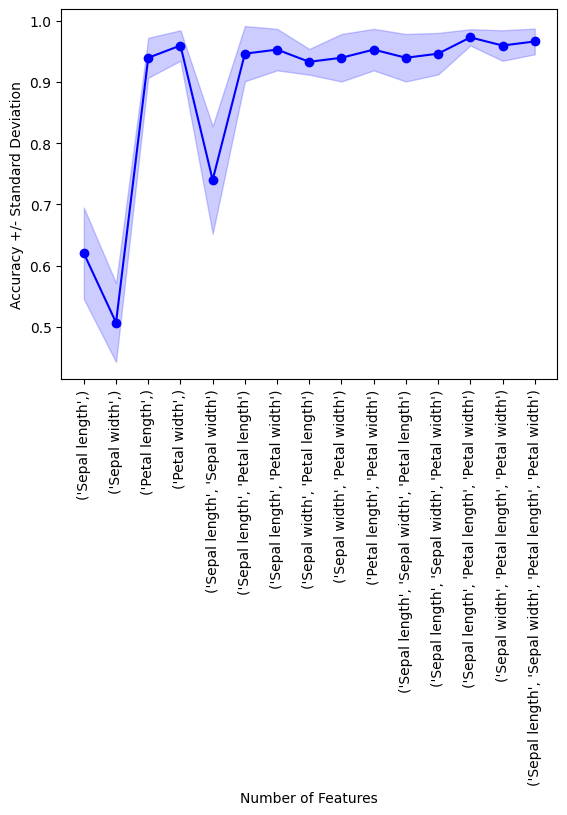

In [10]:
import matplotlib.pyplot as plt

metric_dict = efs1.get_metric_dict()

fig = plt.figure()
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])
    
plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

## Example 3 - Exhaustive feature selection for regression analysis

Similar to the classification examples above, the `SequentialFeatureSelector` also supports scikit-learn's estimators
for regression.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

efs = EFS(lr, 
          min_features=10,
          max_features=12,
          scoring='neg_mean_squared_error',
          cv=10)

efs.fit(X, y)

print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


## Example 4 - Regression and adjusted R2

As shown in Example 3, the exhaustive feature selector can be used for selecting features via a regression model. In regression analysis, there exists the common phenomenon that the $R^2$ score can become spuriously inflated the more features we choose. Hence, and this is especially true for feature selection, it is useful to make model comparisons based on the adjusted $R^2$ value rather than the regular $R^2$. The adjusted $R^2$, $\bar{R}^{2}$, accounts for the number of features and examples as follows:

$$\bar{R}^{2}=1-\left(1-R^{2}\right) \frac{n-1}{n-p-1},$$

where $n$ is the number of examples and $p$ is the number of features.

One of the advantages of scikit-learn's API is that it's consistent, intuitive, and simple to use. However, one downside of this API design is that it can be a bit restrictive for certain scenarios. For instance, scikit-learn scoring function only take two inputs, the predicted and the true target values. Hence, we cannot use scikit-learn's scoring API to compute the adjusted $R^2$, which also requires the number of features.

However, as a workaround, we can compute the $R^2$ for the different feature subsets and then do a posthoc computation to obtain the adjusted $R^2$.

**Step 1: Compute $R^2$:**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

efs = EFS(
    lr,
    min_features=10,
    max_features=12,
    scoring="r2",
    cv=10,
)

efs.fit(X, y)
# fixed the issue
print(f"Best R2 score: {efs.best_score_:.2f}")
print(f"Best subset: {efs.best_idx_}")

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


**Step 2: Compute adjusted $R^2$:**

In [ ]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

In [ ]:
for i in efs.subsets_:
    efs.subsets_[i]["adjusted_avg_score"] = adjust_r2(
        r2=efs.subsets_[i]["avg_score"],
        num_examples=int(X.shape[0] / 10),
        num_features=len(efs.subsets_[i]["feature_idx"]),
    )

**Step 3: Select best subset based on adjusted $R^2$:**

In [ ]:
score = -99e10

for i in efs.subsets_:
    score = efs.subsets_[i]['adjusted_avg_score']
    if ( efs.subsets_[i]['adjusted_avg_score'] == score and
        len(efs.subsets_[i]['feature_idx']) < len(efs.best_idx_) )\
      or efs.subsets_[i]['adjusted_avg_score'] > score:
        efs.best_idx_ = efs.subsets_[i]['feature_idx']

In [ ]:
print(f"Best R2 score (adjusted for best subset): {efs.best_score_:.2f}")
print(f"Best subset: {efs.best_idx_}")


Best subset: (1, 3, 5, 6, 7, 8, 9, 10, 11, 12)


## Example 5 - Using the selected feature subset For making new predictions

In [ ]:
# Initialize the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Select the "best" three features via
# 5-fold cross-validation on the training set.

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           cv=5)
efs1 = efs1.fit(X_train, y_train)

Features: 15/15

In [ ]:
print('Selected features:', efs1.best_idx_)

Selected features: (2, 3)


In [ ]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, efs1.k_feature_idx_]

X_train_efs = efs1.transform(X_train)
X_test_efs = efs1.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn.fit(X_train_efs, y_train)
y_pred = knn.predict(X_test_efs)

# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc*100))

Test set accuracy: 96.00 %


## Example 6 - Exhaustive feature selection and GridSearch

In [ ]:
# Initialize the dataset

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=1)

Use scikit-learn's `GridSearch` to tune the hyperparameters of the `LogisticRegression` estimator inside the `ExhaustiveFeatureSelector` and use it for prediction in the pipeline. **Note that the `clone_estimator` attribute needs to be set to `False`.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression( solver='newton-cg', 
                        random_state=123)

efs1 = EFS(estimator=lr, 
           min_features=2,
           max_features=3,
           scoring='accuracy',
           print_progress=False,
           clone_estimator=False,
           cv=5,
           n_jobs=1)

pipe = make_pipeline(efs1, lr)

param_grid = {'exhaustivefeatureselector__estimator__C': [0.1, 1.0, 10.0]}
    
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=2, 
                  verbose=1, 
                  refit=False)

# run gridearch
gs = gs.fit(X_train, y_train)

NameError: name 'X_train' is not defined

... and the "best" parameters determined by GridSearch are ...

In [ ]:
print("Best parameters via GridSearch", gs.best_params_)

Best parameters via GridSearch {'exhaustivefeatureselector__estimator__C': 0.1}


#### Obtaining the best *k* feature indices after GridSearch

If we are interested in the best *k* best feature indices via `SequentialFeatureSelection.best_idx_`, we have to initialize a `GridSearchCV` object with `refit=True`. Now, the grid search object will take the complete training dataset and the best parameters, which it found via cross-validation, to train the estimator pipeline.

In [ ]:
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=2, 
                  verbose=1, 
                  refit=True)

After running the grid search, we can access the individual pipeline objects of the `best_estimator_` via the `steps` attribute.

In [ ]:
gs = gs.fit(X_train, y_train)
gs.best_estimator_.steps

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[('exhaustivefeatureselector',
  ExhaustiveFeatureSelector(clone_estimator=False,
                            estimator=LogisticRegression(C=0.1,
                                                         multi_class='multinomial',
                                                         random_state=123,
                                                         solver='newton-cg'),
                            feature_groups=[[0], [1], [2], [3]], max_features=3,
                            min_features=2, print_progress=False)),
 ('logisticregression',
  LogisticRegression(multi_class='multinomial', random_state=123,
                     solver='newton-cg'))]

Via sub-indexing, we can then obtain the best-selected feature subset:

In [ ]:
print('Best features:', gs.best_estimator_.steps[0][1].best_idx_)

Best features: (2, 3)


During cross-validation, this feature combination had a CV accuracy of:

In [ ]:
print('Best score:', gs.best_score_)

Best score: 0.96


In [ ]:
gs.best_params_

{'exhaustivefeatureselector__estimator__C': 0.1}

**Alternatively**, if we can set the "best grid search parameters" in our pipeline manually if we ran `GridSearchCV` with `refit=False`. It should yield the same results:

In [ ]:
pipe.set_params(**gs.best_params_).fit(X_train, y_train)
print('Best features:', pipe.steps[0][1].best_idx_)

Best features: (2, 3)


## Example 7 - Exhaustive Feature Selection with LOOCV

The `ExhaustiveFeatureSelector` is not restricted to k-fold cross-validation. You can use any type of cross-validation method that supports the general scikit-learn cross-validation API. 

The following example illustrates the use of scikit-learn's `LeaveOneOut` cross-validation method in combination with the exhaustive feature selector.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.model_selection import LeaveOneOut


iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=LeaveOneOut()) ### Use cross-validation generator here

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: 0.96
Best subset (indices): (3,)
Best subset (corresponding names): ('3',)


## Example 8 - Interrupting Long Runs for Intermediate Results

If your run is taking too long, it is possible to trigger a `KeyboardInterrupt` (e.g., ctrl+c on a Mac, or interrupting the cell in a Jupyter notebook) to obtain temporary results.

**Toy dataset**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(
    n_samples=200000,
    n_features=6,
    n_informative=2,
    n_redundant=1,
    n_repeated=1,
    n_clusters_per_class=2,
    flip_y=0.05,
    class_sep=0.5,
    random_state=123,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

**Long run with interruption**

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

efs1 = EFS(model, 
           min_features=1, 
           max_features=4,
           print_progress=True,
           scoring='accuracy')

efs1 = efs1.fit(X_train, y_train)

Features: 56/56

**Finalizing the fit**

Note that the feature selection run hasn't finished, so certain attributes may not be available. In order to use the EFS instance, it is recommended to call `finalize_fit`, which will make EFS estimator appear as "fitted" process the temporary results:

In [ ]:
efs1.finalize_fit()

In [ ]:
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)

Best accuracy score: 0.73
Best subset (indices): (1, 2)


## Example 9 - Working with Feature Groups

Since mlxtend v0.21.0, it is possible to specify feature groups. Feature groups allow you to group certain features together, such that they are always selected as a group. This can be very useful in contexts similar to one-hot encoding -- if you want to treat the one-hot encoded feature as a single feature:

![](SequentialFeatureSelector_files/feature_groups.jpeg)

In the following example, we specify sepal length and sepal width as a feature group so that they are always selected together:

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

X_df = pd.DataFrame(X, columns=['sepal len', 'petal len',
                                'sepal wid', 'petal wid'])
X_df.head()

,sepal len,petal len,sepal wid,petal wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=2,
           max_features=2,
           scoring='accuracy',
           feature_groups=[['sepal len', 'sepal wid'], ['petal len'], ['petal wid']],
           cv=3)

efs1 = efs1.fit(X_df, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 3/3

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal len', 'sepal wid', 'petal wid')


Notice that the returned number of features is 3, since the number of `min_features` and `max_features` corresponds to the number of feature groups. I.e., we have 2 feature groups in `['sepal len', 'sepal wid'], ['petal wid']`, but it expands to 3 features.

## API

In [ ]:
with open('../../api_modules/mlxtend.feature_selection/ExhaustiveFeatureSelector.md', 'r') as f:
    print(f.read())

## ExhaustiveFeatureSelector

*ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True, fixed_features=None, feature_groups=None)*

Exhaustive Feature Selection for Classification and Regression.
    (new in v0.4.3)

**Parameters**

- `estimator` : scikit-learn classifier or regressor



- `min_features` : int (default: 1)

    Minumum number of features to select


- `max_features` : int (default: 1)

    Maximum number of features to select. If parameter `feature_groups` is not
    None, the number of features is equal to the number of feature groups, i.e.
    `len(feature_groups)`. For  example, if `feature_groups = [[0], [1], [2, 3],
    [4]]`, then the `max_features` value cannot exceed 4.


- `print_progress` : bool (default: True)

    Prints progress as the number of epochs
    to stderr.


- `scoring` : str, (default='accuracy')

    Scoring metric in {accuracy, 